In [11]:
# Title: Alphabet Classification with Neural Networks

# ## 1. Import Libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [12]:
# ## 2. Load and Preprocess Data
# Load the data
data = pd.read_csv('Alphabets_data.csv')  # Update with actual file path


In [13]:
# Display the first few rows of the dataset
data.head()

# Separate features and target
X = data.drop('letter', axis=1)  # Replace 'target' with actual column name if different
y = data['letter']

# Encode target labels (assuming 26 unique values for each alphabet)

le = LabelEncoder()
y_encoded = le.fit_transform(data['letter'])
y_encoded = to_categorical(y_encoded, num_classes=26)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# ## 3. Define the Neural Network Model
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Additional hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (26 units for each alphabet class, using softmax for multiclass classification)
model.add(Dense(26, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# ## 4. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# ## 5. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2568 - loss: 2.6609 - val_accuracy: 0.6756 - val_loss: 1.2134
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7090 - loss: 1.0549 - val_accuracy: 0.7556 - val_loss: 0.8686
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.7938 - val_accuracy: 0.7934 - val_loss: 0.7305
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8069 - loss: 0.6816 - val_accuracy: 0.8181 - val_loss: 0.6508
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.5636 - val_accuracy: 0.8275 - val_loss: 0.5889
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8478 - loss: 0.5280 - val_accuracy: 0.8416 - val_loss: 0.5388
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.4711 - val_accuracy: 0.8541 - val_loss: 0.4937
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.4392 - val_accuracy: 0.

In [17]:
# ## 6. Evaluate the Model
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Generate a classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9346 - loss: 0.2145
Test Accuracy: 0.9380000233650208
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       149
           1       0.93      0.91      0.92       153
           2       0.97      0.82      0.89       137
           3       0.90      0.97      0.94       156
           4       0.86      0.97      0.91       141
           5       0.91      0.91      0.91       140
           6       0.90      0.91      0.91       160
           7       0.94      0.83      0.88       144
           8       0.96      0.95      0.96       146
           9       0.97      0.95      0.96       149
          10       0.93      0.90      0.91       130
          11       0.94      0.97      0.95       155
          12       0.97      0.99      0.98       168
          13       0.97      0.95      0.96       151
          14       0.95      0.90      

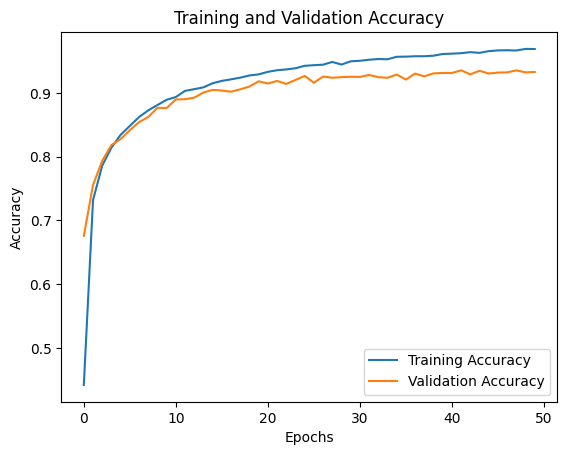

In [18]:
# ## 7. Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# Import Required Libraries
# !pip install scikeras
import pandas as pd
import numpy as np
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras
# ... rest of your code ...
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Define the Model Creation Function
def create_model(optimizer='adam', neurons=32, activation='relu'): # Include activation as an argument
    model = Sequential()
    # Input layer and hidden layers
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation)) # Use activation here
    model.add(Dense(neurons, activation=activation)) # Use activation here
    # Output layer (26 classes for alphabets, softmax for multiclass classification)
    model.add(Dense(26, activation='softmax'))
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the Hyperparameter Grid (Remove 'activation' from here)
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50],
    'optimizer': ['rmsprop'],
    # 'model__neurons': [32, 64, 128], # Pass neurons as 'model__neurons'
    'model__activation': ['relu'] # Pass activation as 'model__activation'
}

# Set Up and Run Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the Best Score and Hyperparameters
print("Best Accuracy: {:.2f} using {}".format(grid_result.best_score_, grid_result.best_params_))

# Train Final Model Using Best Hyperparameters
best_params = grid_result.best_params_

# Rebuild the model with best parameters
final_model = create_model(
    optimizer=best_params['optimizer'],
     # Access neurons with 'model__neurons'
    activation=best_params['model__activation'] # Access activation with 'model__activation'
)

# Train the model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the Model on the Test Data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

# Generate a Classification Report
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

In [25]:
final_model = create_model(
    optimizer=best_params['optimizer'],
     # Access neurons with 'model__neurons'
    activation=best_params['model__activation'] # Access activation with 'model__activation'
)

# Train the model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the Model on the Test Data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

# Generate a Classification Report
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3098 - loss: 2.4417
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7264 - loss: 0.9670
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7753 - loss: 0.7630
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8038 - loss: 0.6721
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8203 - loss: 0.5945
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8384 - loss: 0.5327
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4905
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8684 - loss: 0.4327
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8703 - loss: 0.4305
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8765 - loss: 0.4057
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8807 - loss: 0.3901
Epoch 12/50
1000/1000 ━━━━━━━━